In [1]:
!pip install -q transformers datasets
from datasets import load_dataset
from huggingface_hub import notebook_login
notebook_login()

In [2]:

import numpy as np
from datasets import load_dataset
dataset = load_dataset("LucasThil/randomized_clean_miniwob_episodes_v2")


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['task_name', 'utterance', 'reward', 'raw_reward', 'processed_states'],
        num_rows: 13412
    })
})

In [4]:
!git clone https://github.com/LucasStill/miniwob_zip.git

Cloning into 'miniwob_zip'...
remote: Enumerating objects: 24143, done.
remote: Counting objects: 100% (598/598), done.
remote: Compressing objects: 100% (597/597), done.
remote: Total 24143 (delta 2), reused 593 (delta 1), pack-reused 23545
Receiving objects: 100% (24143/24143), 411.37 MiB | 19.47 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (38059/38059), done.


In [39]:
forbidden_indexes = [2, 12, 13, 19, 20, 21, 37, 64, 74, 81, 101, 117, 129, 135, 142, 143, 149, 152, 154, 158, 159, 161, 177, 185, 193, 199, 212, 219, 230, 231, 240, 247, 250, 264, 279, 307, 333, 339, 353, 358, 359, 367, 370, 383, 393, 394, 395, 406, 407, 416, 417, 422, 429, 438, 439, 460, 461, 471, 476, 477, 484, 494, 502, 503, 504, 509, 546, 556, 574, 586, 591, 596, 597, 610, 611, 624, 625, 639, 644, 721, 803, 815, 837, 879, 935, 954, 955, 960, 985, 992, 1000, 1043, 1060, 1077, 1137, 1146, 1175, 1190, 1207, 1225, 1239, 1289, 1312, 1326, 1331, 1396, 1436, 1441, 1456, 1486, 1500, 1548, 1560, 1598, 1599, 1604, 1618, 1627, 1631, 1641, 1647, 1690, 1710, 1828, 1848, 1941, 1957, 1981, 2039, 2066, 2071, 2083, 2094, 2119, 2126, 2173, 2181, 2242, 2284, 2292, 2320, 2363, 2386, 2420, 2463, 2497, 2511, 2538, 2544, 2552, 2559, 2594, 2609, 2668, 2669, 2675, 2687, 2691, 2716, 2723, 2734, 2760, 2810, 2825, 2855, 2858, 2860, 2870, 2871, 2883, 2904, 2930, 2947, 2950, 2965, 2972, 2978, 2996, 3003, 3009, 3019, 3050, 3073, 3079, 3081, 3091, 3096, 3100, 3111, 3135, 3166, 3171, 3182, 3188, 3194, 3195, 3208, 3209, 3214, 3256, 3263, 3265, 3268, 3280, 3287, 3322, 3324, 3334, 3352, 3377, 3385, 3388, 3393, 3399, 3406, 3407, 3411, 3425, 3429, 3445, 3467, 3482, 3483, 3505, 3512, 3520, 3530, 3573, 3580, 3581, 3587, 3596, 3623, 3629, 3648, 3654, 3660, 3692, 3714, 3715, 3730, 3740, 3756, 3762, 3779, 3786, 3790, 3791, 3804, 3813, 3830, 3868, 3872, 3925, 3988, 3995, 4023, 4042, 4085, 4102, 4113, 4136, 4137, 4140, 4175, 4206, 4225, 4245, 4253, 4267, 4294, 4299, 4312, 4330, 4336, 4351, 4396, 4414, 4420, 4430, 4457, 4462, 4463, 4486, 4500, 4534, 4538, 4543, 4548, 4561, 4577, 4631, 4651, 4678, 4687, 4696, 4724, 4733, 4739, 4744, 4752, 4753, 4783, 4788, 4801, 4838, 4842, 4902, 5101, 5311, 5344, 5358, 5359, 5417, 5502, 5658, 5713, 5803, 6012, 6167, 6182, 6269, 6407, 6459, 6482, 6495, 6756, 6790, 7059, 7071, 7196, 7200, 7217, 7229, 7255, 7293, 7299, 7302, 7304, 7320, 7337, 7356, 7369, 7373, 7375, 7386, 7402, 7419, 7426, 7430, 7437, 7450, 7496, 7507, 7545, 7552, 7567, 7615, 7656, 7665, 7669, 7674, 7687, 7700, 7710, 7722, 7734, 7735, 7742, 7748, 7754, 7759, 7760, 7807, 7834, 7839, 7842, 7866, 7871, 7877, 7882, 7883, 7888, 7893, 7894, 7926, 7931, 7973, 7975, 7980, 8016, 8034, 8043, 8054, 8061, 8085, 8095, 8098, 8099, 8104, 8108, 8109, 8174, 8186, 8244, 8289, 8295, 8304, 8330, 8350, 8356, 8362, 8363, 8368, 8379, 8381, 8403, 8408, 8415, 8426, 8427, 8437, 8445, 8446, 8463, 8480, 8481, 8490, 8501, 8517, 8524, 8525, 8528, 8534, 8543, 8548, 8549, 8555, 8576, 8577, 8593, 8602, 8759, 8771, 8782, 8788, 8801, 8816, 8849, 8866, 8899, 8918, 8921, 8957, 9117, 9122, 9161, 9176, 9177, 9192, 9218, 9230, 9250, 9257, 9265, 9272, 9279, 9307, 9324, 9329, 9339, 9345, 9367, 9394, 9395, 9416, 9423, 9455, 9476, 9489, 9498, 9520, 9527, 9551, 9569, 9682, 9863, 9869, 9985, 10068, 10078, 10080, 10083, 10092, 10095, 10098, 10102, 10105, 10108, 10111, 10112, 10115, 10116, 10119, 10120, 10124, 10125, 10130, 10132, 10134, 10137, 10151, 10152, 10176, 10181, 10183, 10186, 10199, 10207, 10210, 10212, 10214, 10215, 10221, 10247, 10253, 10254, 10255, 10259, 10260, 10268, 10283, 10285, 10287, 10294, 10296, 10298, 10300, 10308, 10316, 10320, 10323, 10326, 10328, 10330, 10331, 10332, 10333, 10338, 10349, 10363, 10366, 10375, 10383, 10389, 10392, 10397, 10398, 10406, 10408, 10409, 10413, 10421, 10423, 10425, 10427, 10432, 10433, 10437, 10442, 10452, 10459, 10461, 10481, 10484, 10486, 10496, 10503, 10504, 10507, 10524, 10528, 10529, 10530, 10531, 10542, 10555, 10557, 10558, 10564, 10566, 10573, 10575, 10577, 10583, 10592, 10596, 10602, 10604, 10610, 10621, 10622, 10641, 10645, 10649, 10661, 10664, 10668, 10672, 10683, 10687, 10693, 10694, 10695, 10696, 10700, 10711, 10714, 10720, 10727, 10744, 10748, 10749, 10750, 10758, 10760, 10767, 10774, 10782, 10790, 10792, 10797, 10806, 10807, 10808, 10811, 10820, 10822, 10832, 10836, 10842, 10843, 10845, 10849, 10855, 10866, 10867, 10870, 10872, 10873, 10880, 10885, 10886, 10887, 10898, 10901, 10905, 10908, 10914, 10917, 10920, 10922, 10926, 10927, 10929, 10932, 10934, 10941, 10942, 10954, 10955, 10961, 10964, 10976, 10977, 10980, 10981, 10983, 10999, 11001, 11003, 11013, 11016, 11019, 11021, 11023, 11029, 11035, 11036, 11041, 11047, 11048, 11049, 11056, 11063, 11070, 11073, 11083, 11084, 11088, 11092, 11098, 11106, 11116, 11120, 11121, 11128, 11129, 11130, 11133, 11142, 11144, 11153, 11159, 11163, 11169, 11170, 11178, 11180, 11181, 11183, 11189, 11192, 11204, 11205, 11210, 11226, 11227, 11233, 11244, 11251, 11253, 11258, 11259, 11266, 11268, 11270, 11275, 11288, 11291, 11297, 11298, 11308, 11310, 11311, 11324, 11327, 11330, 11332, 11335, 11339, 11341, 11344, 11348, 11350, 11359, 11370, 11376, 11377, 11379, 11390, 11398, 11401, 11402, 11406, 11414, 11416, 11419, 11420, 11428, 11440, 11445, 11454, 11459, 11460, 11461, 11462, 11463, 11467, 11472, 11480, 11483, 11492, 11500, 11507, 12272, 12279, 12296, 12297, 12306, 12307, 12332, 12333, 12339, 12352, 12371, 12394, 12395, 12400, 12401, 12411, 12417, 12476, 12477, 12492, 12493, 12498, 12499, 12503, 12508, 12509, 12534, 12538, 12556, 12557, 12562, 12563, 12574, 12575, 12590, 12591, 12610, 12611, 12652, 12653, 12658, 12659, 12666, 12667, 12682, 12683, 12688, 12689, 12713, 12718, 12719, 12726, 12727, 12730, 12731, 12802, 12803, 12836, 12837, 12840, 12841, 12874, 12875, 12890, 12891, 12900, 12901, 12934, 12935, 12942, 12943, 12948, 12949, 12954, 12976, 12977, 12984, 12985, 12992, 12993, 12998, 12999, 13000, 13016, 13017, 13022, 13023, 13028, 13029, 13054, 13055, 13060, 13061, 13084, 13085, 13098, 13099, 13102, 13114, 13115, 13120, 13121, 13157, 13162, 13163, 13168, 13169, 13187, 13191, 13206, 13207, 13245, 13252, 13259, 13270, 13271, 13294, 13295, 13304, 13305, 13312, 13313, 13330, 13331, 13346, 13347, 13365, 13372, 13373, 13378, 13379, 13380, 13381, 13396, 13397, 13402, 13403, 13408, 13409]
print(len(forbidden_indexes))
forbidden_indexes = forbidden_indexes + [8, 63, 86, 87, 90, 134, 155, 160, 166, 204, 213, 227, 241, 272, 274, 290, 334, 345, 423, 434, 492, 495, 505, 515, 521, 572, 587, 607, 638, 671, 773, 778, 814, 857, 901, 929, 1001, 1017, 1029, 1034, 1098, 1103, 1108, 1147, 1210, 1254, 1318, 1415, 1501, 1517, 1523, 1529, 1630, 1636, 1646, 1679, 1739, 1744, 1753, 1817, 1855, 1936, 1962, 1969, 2025, 2032, 2038, 2104, 2113, 2131, 2150, 2196, 2201, 2255, 2308, 2313, 2419, 2465, 2525, 2567, 2621, 2700, 2701, 2742, 2749, 2754, 2784, 2785, 2793, 2807, 2824, 2828, 2832, 2867, 2885, 2919, 2931, 2946, 2973, 2980, 2997, 3008, 3013, 3030, 3031, 3065, 3074, 3075, 3078, 3090, 3133, 3139, 3145, 3167, 3227, 3262, 3269, 3274, 3291, 3300, 3348, 3349, 3354, 3410, 3432, 3452, 3453, 3458, 3459, 3466, 3470, 3494, 3515, 3519, 3546, 3557, 3572, 3601, 3622, 3634, 3655, 3661, 3676, 3684, 3693, 3698, 3703, 3763, 3769, 3775, 3805, 3812, 3826, 3827, 3847, 3932, 3944, 3945, 3953, 4000, 4022, 4049, 4077, 4103, 4156, 4174, 4224, 4232, 4252, 4259, 4271, 4289, 4337, 4372, 4379, 4380, 4397, 4409, 4415, 4437, 4490, 4522, 4523, 4529, 4539, 4555, 4592, 4593, 4598, 4613, 4656, 4662, 4664, 4725, 4738, 4745, 4759, 4766, 4789, 4816, 4828, 4834, 4849, 4855, 5091, 5188, 5251, 5265, 5333, 5382, 5401, 5772, 5815, 5886, 5901, 5916, 5992, 6065, 6132, 6328, 6354, 6406, 6432, 6494, 6616, 6622, 6813, 6847, 7070, 7216, 7222, 7277, 7298, 7305, 7372, 7374, 7390, 7396, 7404, 7405, 7451, 7464, 7472, 7478, 7479, 7497, 7511, 7524, 7570, 7571, 7576, 7582, 7588, 7589, 7595, 7603, 7614, 7620, 7640, 7650, 7680, 7681, 7701, 7717, 7723, 7783, 7785, 7801, 7838, 7843, 7852, 7859, 7867, 7870, 7912, 7918, 7946, 7947, 7950, 7965, 7978, 7981, 7997, 8001, 8007, 8023, 8028, 8035, 8042, 8049, 8055, 8077, 8092, 8105, 8130, 8136, 8137, 8162, 8175, 8207, 8225, 8232, 8233, 8253, 8259, 8260, 8261, 8282, 8283, 8319, 8326, 8346, 8351, 8357, 8373, 8397, 8444, 8450, 8464, 8468, 8474, 8554, 8592, 8605, 8627, 8664, 8744, 8767, 8794, 8800, 8835, 8902, 8927, 8969, 9004, 9020, 9040, 9075, 9091, 9135, 9145, 9148, 9149, 9155, 9160, 9170, 9193, 9198, 9205, 9246, 9247, 9262, 9278, 9280, 9287, 9333, 9352, 9366, 9422, 9449, 9492, 9536, 9541, 9565, 9751, 9874, 9942, 10033, 10053, 10072, 10074, 10081, 10082, 10084, 10085, 10089, 10096, 10097, 10103, 10109, 10117, 10123, 10127, 10139, 10141, 10143, 10149, 10150, 10160, 10164, 10169, 10174, 10175, 10177, 10185, 10188, 10192, 10196, 10201, 10203, 10230, 10233, 10237, 10241, 10242, 10258, 10265, 10269, 10270, 10281, 10299, 10302, 10306, 10317, 10318, 10329, 10334, 10336, 10340, 10343, 10346, 10347, 10355, 10360, 10362, 10364, 10367, 10368, 10372, 10373, 10376, 10379, 10387, 10388, 10405, 10407, 10414, 10415, 10417, 10422, 10426, 10428, 10429, 10434, 10436, 10438, 10446, 10449, 10454, 10456, 10462, 10466, 10467, 10471, 10477, 10487, 10489, 10493, 10498, 10499, 10508, 10515, 10517, 10520, 10523, 10525, 10527, 10533, 10538, 10543, 10549, 10552, 10559, 10565, 10570, 10574, 10576, 10586, 10588, 10589, 10601, 10611, 10618, 10623, 10628, 10631, 10633, 10640, 10644, 10646, 10647, 10654, 10655, 10666, 10677, 10679, 10682, 10691, 10698, 10701, 10703, 10704, 10705, 10707, 10723, 10732, 10733, 10737, 10746, 10751, 10756, 10761, 10769, 10771, 10777, 10778, 10780, 10787, 10789, 10813, 10815, 10824, 10826, 10827, 10833, 10844, 10850, 10852, 10853, 10858, 10859, 10874, 10877, 10881, 10884, 10889, 10899, 10902, 10907, 10911, 10913, 10915, 10921, 10928, 10931, 10936, 10937, 10938, 10939, 10967, 10969, 10970, 10979, 10997, 11000, 11006, 11010, 11011, 11014, 11020, 11028, 11030, 11032, 11034, 11042, 11044, 11051, 11055, 11061, 11068, 11074, 11077, 11091, 11096, 11100, 11102, 11104, 11107, 11109, 11115, 11118, 11119, 11122, 11123, 11125, 11136, 11140, 11146, 11148, 11150, 11161, 11165, 11172, 11196, 11211, 11213, 11223, 11224, 11234, 11241, 11245, 11248, 11250, 11252, 11257, 11261, 11265, 11267, 11272, 11274, 11277, 11278, 11279, 11285, 11290, 11294, 11295, 11299, 11304, 11305, 11307, 11309, 11316, 11333, 11337, 11340, 11347, 11349, 11351, 11354, 11356, 11357, 11358, 11361, 11367, 11371, 11372, 11374, 11383, 11386, 11388, 11392, 11393, 11410, 11412, 11417, 11422, 11430, 11436, 11438, 11441, 11452, 11453, 11458, 11473, 11476, 11479, 11484, 11486, 11490, 11493, 11504, 11510, 11511, 11529, 11788, 11789, 11790, 11791, 11792, 11795, 11796, 11797, 12355, 12423, 12428, 12460, 12535, 12586, 12702, 12703, 12704, 12705, 12706, 12707, 12708, 12709, 12710, 12711, 12712, 12747, 12772]
print(len(forbidden_indexes))
forbidden_indexes += [68, 645, 652, 653, 658, 666, 667, 670, 683, 688, 694, 695, 712, 713, 714, 718, 719, 720, 726, 727, 731, 746, 747, 750, 764, 765, 772, 779, 780, 781, 796, 797, 802, 804, 808, 809, 820, 821, 836, 840, 841, 856, 862, 863, 868, 869, 874, 886, 887, 890, 891, 897, 900, 906, 916, 917, 922, 923, 932, 933, 934, 943, 948, 961, 976, 977, 994, 995, 998, 1023, 1028, 1035, 1039, 1049, 1054, 1055, 1076, 1085, 1092, 1099, 1109, 1115, 1141, 1157, 1162, 1163, 1169, 1174, 1186, 1187, 1191, 1196, 1206, 1224, 1232, 1233, 1238, 1244, 1245, 1252, 1253, 1255, 1258, 1259, 1267, 1270, 1283, 1288, 1294, 1295, 1304, 1305, 1315, 1319, 1321, 1327, 1347, 1364, 1373, 1378, 1379, 1380, 1381, 1397, 1402, 1403, 1408, 1409, 1412, 1414, 1421, 1450, 1451, 1457, 1463, 1469, 1474, 1490, 1491, 1516, 1528, 1534, 1542, 1543, 1555, 1567, 1576, 1577, 1584, 1585, 1588, 1593, 1605, 1609, 1612, 1626, 1640, 1650, 1651, 1665, 1672, 1673, 1675, 1678, 1680, 1681, 1691, 1696, 1706, 1707, 1711, 1724, 1725, 1732, 1738, 1745, 1752, 1758, 1759, 1767, 1770, 1771, 1782, 1783, 1788, 1789, 1792, 1794, 1795, 1800, 1801, 1816, 1822, 1823, 1824, 1829, 1834, 1835, 1842, 1843, 1860, 1861, 1866, 1867, 1876, 1877, 1884, 1885, 1893, 1898, 1902, 1915, 1921, 1937, 1940, 1956, 1974, 1986, 1987, 1990, 1991, 2000, 2007, 2010, 2011, 2033, 2045, 2052, 2053, 2058, 2059, 2082, 2089, 2095, 2109, 2112, 2118, 2127, 2130, 2140, 2146, 2147, 2151, 2172, 2178, 2179, 2197, 2222, 2223, 2228, 2229, 2234, 2235, 2243, 2248, 2249, 2254, 2259, 2261, 2266, 2267, 2276, 2277, 2285, 2289, 2315, 2326, 2336, 2337, 2340, 2341, 2357, 2362, 2368, 2369, 2374, 2375, 2390, 2391, 2404, 2405, 2412, 2413, 2414, 2418, 2430, 2431, 2446, 2447, 2451, 2456, 2464, 2472, 2473, 2478, 2479, 2481, 2487, 2506, 2507, 2539, 2545, 2553, 2558, 2566, 2570, 2571, 2582, 2588, 2595, 2603, 2608, 2614, 2620, 2630, 2631, 2636, 2637, 2640, 2647, 2656, 2657, 2662, 2663, 2672, 2690, 2696, 2717, 2728, 2729, 2735, 2739, 2755, 2761, 2777, 2792, 2798, 2799, 2806, 2811, 2816, 2822, 2829, 2833, 2838, 2839, 2844, 2845, 2852, 2853, 2854, 2859, 2861, 2884, 2889, 2895, 2905, 2912, 2913, 2918, 2921, 2926, 2927, 2951, 2956, 2957, 2964, 2968, 2969, 2979, 2981, 3002, 3004, 3005, 3018, 3026, 3027, 3041, 3046, 3047, 3051, 3064, 3072, 3080, 3097, 3106, 3107, 3110, 3124, 3125, 3132, 3138, 3143, 3144, 3152, 3153, 3158, 3159, 3170, 3183, 3189, 3199, 3202, 3203, 3213, 3215, 3220, 3221, 3226, 3236, 3237, 3241, 3257, 3264, 3275, 3281, 3286, 3290, 3301, 3316, 3317, 3323, 3325, 3329, 3335, 3343, 3355, 3358, 3359, 3360, 3361, 3367, 3376, 3384, 3389, 3392, 3416, 3424, 3438, 3439, 3444, 3454, 3461, 3484, 3485, 3488, 3489, 3504, 3513, 3521, 3526, 3527, 3531, 3547, 3550, 3551, 3556, 3564, 3565, 3569, 3578, 3579, 3586, 3597, 3600, 3606, 3607, 3616, 3617, 3635, 3639, 3642, 3643, 3649, 3677, 3685, 3699, 3702, 3708, 3709, 3720, 3721, 3736, 3741, 3747, 3768, 3773, 3774, 3787, 3818, 3819, 3831, 3846, 3850, 3865, 3869, 3873, 3878, 3879, 3880, 3906, 3911, 3924, 3938, 3939, 3952, 3955, 3958, 3966, 3967, 3970, 3971, 3982, 3983, 3985, 3989, 3994, 4017, 4028, 4029, 4034, 4035, 4043, 4048, 4054, 4055, 4060, 4061, 4067, 4076, 4084, 4093, 4099, 4108, 4115, 4120, 4121, 4141, 4157, 4162, 4164, 4168, 4169, 4180, 4186, 4187, 4190, 4191, 4207, 4210, 4211, 4233, 4239, 4248, 4258, 4266, 4270, 4283, 4288, 4295, 4298, 4304, 4308, 4313, 4318, 4319, 4331, 4341, 4346, 4350, 4364, 4365, 4373, 4378, 4381, 4402, 4403, 4404, 4408, 4421, 4431, 4436, 4440, 4469, 4474, 4475, 4487, 4491, 4501, 4516, 4528, 4542, 4584, 4585, 4599, 4604, 4614, 4619, 4627, 4630, 4646, 4650, 4663, 4665, 4672, 4673, 4679, 4680, 4681, 4686, 4706, 4707, 4710, 4711, 4728, 4732, 4767, 4770, 4771, 4782, 4794, 4800, 4806, 4817, 4823, 4829, 4835, 4843, 4845, 4854, 4884, 4908, 4915, 4920, 4937, 4969, 5008, 5020, 5036, 5148, 5155, 5212, 5230, 5231, 5246, 5250, 5264, 5278, 5306, 5339, 5345, 5366, 5395, 5443, 5476, 5498, 5503, 5520, 5556, 5562, 5563, 5568, 5574, 5611, 5644, 5666, 5683, 5694, 5712, 5731, 5747, 5765, 5779, 5796, 5808, 5840, 5875, 5891, 5900, 5929, 5993, 6026, 6031, 6051, 6064, 6072, 6078, 6080, 6107, 6145, 6170, 6171, 6189, 6221, 6236, 6237, 6256, 6262, 6287, 6348, 6392, 6399, 6410, 6452, 6467, 6513, 6531, 6643, 6649, 6660, 6714, 6715, 6737, 6769, 6775, 6787, 6805, 6818, 6826, 6830, 6846, 6865, 6872, 6878, 6911, 6953, 6988, 6989, 6995, 7025, 7082, 7088, 7095, 7113, 7118, 7119, 7147, 7164, 7173, 7178, 7181, 7197, 7201, 7234, 7243, 7244, 7248, 7254, 7261, 7276, 7284, 7292, 7303, 7308, 7309, 7314, 7321, 7330, 7336, 7363, 7368, 7387, 7391, 7397, 7412, 7413, 7427, 7431, 7446, 7447, 7465, 7480, 7490, 7506, 7510, 7532, 7533, 7544, 7548, 7549, 7558, 7566, 7577, 7594, 7598, 7602, 7608, 7619, 7621, 7636, 7637, 7657, 7662, 7664, 7668, 7675, 7686, 7711, 7716, 7728, 7729, 7743, 7749, 7755, 7758, 7761, 7776, 7777, 7782, 7784, 7792, 7793, 7798, 7799, 7800, 7806, 7810, 7811, 7824, 7825, 7833, 7844, 7845, 7876, 7889, 7892, 7895, 7904, 7908, 7909, 7913, 7919, 7927, 7930, 7964, 7972, 7979, 7996, 8000, 8006, 8017, 8022, 8029, 8048, 8060, 8076, 8084, 8093, 8094, 8102, 8103, 8114, 8121, 8131, 8140, 8146, 8157, 8163, 8168, 8169, 8178, 8187, 8191, 8210, 8211, 8224, 8238, 8245, 8266, 8267, 8270, 8271, 8294, 8305, 8312, 8313, 8318, 8320, 8321, 8327, 8347, 8364, 8365, 8369, 8378, 8380, 8396, 8402, 8409, 8413, 8414, 8420, 8421, 8436, 8441, 8442, 8443, 8449, 8451, 8584, 8585, 8598, 8599, 8604, 8612, 8613, 8618, 8626, 8630, 8646, 8651, 8672, 8673, 8679, 8680, 8706, 8707, 8710, 8711, 8724, 8725, 8732, 8739, 8749, 8753, 8758, 8766, 8783, 8795, 8799, 8810, 8823, 8828, 8829, 8842, 8854, 8855, 8860, 8867, 8877, 8884, 8893, 8903, 8909, 8915, 8919, 8940, 8956, 8962, 8975, 9002, 9005, 9009, 9015, 9021, 9031, 9041, 9057, 9062, 9063, 9068, 9069, 9086, 9087, 9100, 9101, 9116, 9123, 9129, 9132, 9133, 9134, 9142, 9143, 9154, 9185, 9199, 9212, 9213, 9214, 9219, 9226, 9251, 9264, 9281, 9286, 9296, 9297, 9310, 9311, 9322, 9325, 9328, 9332, 9338, 9344, 9353, 9358, 9359, 9371, 9382, 9388, 9389, 9400, 9417, 9428, 9429, 9434, 9435, 9443, 9448, 9454, 9461, 9484, 9488, 9493, 9499, 9502, 9503, 9508, 9509, 9515, 9540, 9550, 9556, 9557, 9562, 9568, 9574, 9586, 9611, 9624, 9683, 9712, 9750, 9797, 9802, 9815, 9840, 9856, 9862, 9887, 9900, 9934, 9949, 9954, 10006, 10010, 10024, 10025, 10039, 10067, 10069, 10070, 10073, 10075, 10076, 10077, 10079, 10086, 10087, 10088, 10090, 10091, 10093, 10094, 10099, 10100, 10101, 10104, 10106, 10107, 10110, 10113, 10114, 10118, 10121, 10122, 10126, 10128, 10131, 10133, 10135, 10136, 10138, 10140, 10142, 10145, 10146, 10147, 10148, 10153, 10154, 10155, 10156, 10157, 10158, 10159, 10161, 10163, 10165, 10166, 10167, 10168, 10170, 10171, 10172, 10173, 10178, 10180, 10182, 10187, 10189, 10190, 10191, 10193, 10194, 10195, 10197, 10198, 10202, 10205, 10206, 10208, 10209, 10211, 10213, 10216, 10217, 10218, 10219, 10220, 10222, 10223, 10224, 10225, 10226, 10227, 10228, 10229, 10231, 10232, 10234, 10235, 10236, 10238, 10239, 10240, 10243, 10244, 10245, 10246, 10248, 10249, 10250, 10251, 10252, 10256, 10257, 10261, 10262, 10263, 10264, 10266, 10267, 10271, 10272, 10273, 10274, 10275, 10276, 10277, 10278, 10279, 10280, 10282, 10284, 10286, 10288, 10289, 10290, 10291, 10292, 10293, 10295, 10297, 10301, 10303, 10304, 10307, 10309, 10310, 10311, 10312, 10313, 10314, 10315, 10319, 10321, 10324, 10325, 10327, 10335, 10337, 10339, 10341, 10342, 10344, 10345, 10350, 10351, 10352, 10353, 10354, 10356, 10357, 10359, 10361, 10365, 10369, 10370, 10371, 10374, 10377, 10378, 10380, 10381, 10382, 10384, 10385, 10386, 10390, 10393, 10394, 10395, 10396, 10399, 10400, 10401, 10402, 10403, 10404, 10410, 10411, 10412, 10416, 10418, 10419, 10420, 10424, 10430, 10431, 10435, 10439, 10440, 10441, 10443, 10444, 10445, 10447, 10448, 10451, 10453, 10455, 10457, 10458, 10460, 10463, 10464, 10465, 10468, 10469, 10470, 10472, 10473, 10474, 10475, 10476, 10478, 10479, 10480, 10482, 10483, 10485, 10488, 10490, 10491, 10492, 10494, 10495, 10497, 10501, 10502, 10505, 10506, 10509, 10510, 10511, 10512, 10513, 10514, 10516, 10518, 10519, 10521, 10522, 10526, 10532, 10534, 10535, 10536, 10537, 10539, 10540, 10541, 10544, 10545, 10546, 10547, 10548, 10550, 10551, 10553, 10554, 10556, 10560, 10561, 10562, 10563, 10567, 10569, 10571, 10572, 10578, 10579, 10580, 10581, 10582, 10584, 10585, 10587, 10590, 10591, 10593, 10594, 10595, 10597, 10598, 10599, 10600, 10603, 10605, 10606, 10607, 10608, 10609, 10612, 10613, 10614, 10615, 10616, 10617, 10619, 10620, 10624, 10625, 10626, 10627, 10629, 10630, 10635, 10636, 10637, 10639, 10648, 10650, 10651, 10652, 10653, 10656, 10657, 10658, 10659, 10660, 10662, 10663, 10665, 10667, 10669, 10670, 10671, 10673, 10675, 10676, 10678, 10680, 10681, 10684, 10685, 10686, 10688, 10689, 10690, 10692, 10697, 10699, 10702, 10706, 10708, 10709, 10710, 10712, 10713, 10715, 10716, 10717, 10718, 10719, 10721, 10722, 10724, 10725, 10726, 10728, 10729, 10730, 10734, 10735, 10736, 10738, 10739, 10740, 10741, 10742, 10745, 10747, 10752, 10753, 10754, 10755, 10757, 10759, 10762, 10763, 10764, 10765, 10766, 10768, 10770, 10772, 10773, 10775, 10776, 10779, 10781, 10783, 10784, 10785, 10786, 10788, 10791, 10793, 10794, 10795, 10796, 10798, 10799, 10800, 10801, 10802, 10803, 10804, 10805, 10809, 10810, 10812, 10814, 10816, 10817, 10818, 10819, 10821, 10823, 10825, 10828, 10829, 10830, 10831, 10834, 10835, 10837, 10838, 10839, 10840, 10841, 10846, 10847, 10851, 10854, 10856, 10857, 10860, 10861, 10862, 10863, 10864, 10865, 10868, 10869, 10871, 10875, 10876, 10878, 10879, 10882, 10883, 10888, 10890, 10891, 10892, 10893, 10894, 10895, 10896, 10897, 10900, 10903, 10904, 10906, 10909, 10910, 10918, 10919, 10923, 10924, 10925, 10930, 10933, 10935, 10940, 10943, 10944, 10945, 10946, 10947, 10948, 10949, 10950, 10951, 10952, 10953, 10956, 10957, 10958, 10959, 10960, 10962, 10963, 10965, 10966, 10968, 10971, 10972, 10973, 10974, 10975, 10978, 10982, 10984, 10985, 10986, 10987, 10988, 10989, 10990, 10991, 10992, 10993, 10994, 10995, 10996, 10998, 11002, 11004, 11005, 11007, 11008, 11009, 11012, 11015, 11017, 11018, 11022, 11024, 11025, 11027, 11031, 11033, 11037, 11038, 11039, 11040, 11043, 11045, 11046, 11050, 11052, 11053, 11057, 11058, 11059, 11060, 11062, 11065, 11066, 11067, 11069, 11071, 11072, 11075, 11076, 11078, 11079, 11080, 11081, 11082, 11085, 11086, 11087, 11089, 11090, 11094, 11095, 11099, 11101, 11103, 11105, 11108, 11110, 11111, 11112, 11113, 11114, 11117, 11124, 11126, 11127, 11131, 11132, 11134, 11135, 11137, 11138, 11139, 11141, 11143, 11145, 11147, 11149, 11151, 11152, 11154, 11155, 11156, 11157, 11158, 11160, 11162, 11164, 11166, 11167, 11168, 11171, 11173, 11174, 11175, 11176, 11177, 11179, 11182, 11184, 11185, 11186, 11187, 11188, 11190, 11191, 11193, 11194, 11197, 11198, 11199, 11200, 11201, 11202, 11203, 11206, 11207, 11208, 11209, 11212, 11214, 11215, 11216, 11217, 11218, 11219, 11220, 11221, 11222, 11225, 11228, 11229, 11230, 11231, 11232, 11235, 11236, 11237, 11238, 11239, 11240, 11242, 11243, 11246, 11247, 11249, 11254, 11255, 11256, 11260, 11262, 11263, 11264, 11269, 11271, 11273, 11276, 11280, 11281, 11282, 11283, 11284, 11286, 11287, 11289, 11292, 11296, 11300, 11301, 11302, 11303, 11306, 11312, 11313, 11314, 11317, 11318, 11319, 11320, 11321, 11322, 11323, 11325, 11326, 11328, 11329, 11331, 11334, 11336, 11338, 11343, 11345, 11346, 11352, 11353, 11355, 11360, 11362, 11363, 11364, 11365, 11366, 11368, 11369, 11373, 11375, 11378, 11380, 11381, 11382, 11384, 11385, 11387, 11389, 11391, 11395, 11396, 11397, 11399, 11400, 11403, 11404, 11405, 11407, 11408, 11409, 11411, 11413, 11415, 11418, 11421, 11423, 11424, 11425, 11426, 11427, 11429, 11431, 11432, 11433, 11434, 11435, 11437, 11439, 11442, 11443, 11444, 11446, 11447, 11448, 11449, 11450, 11451, 11455, 11456, 11457, 11464, 11465, 11466, 11468, 11469, 11470, 11471, 11474, 11475, 11477, 11478, 11481, 11485, 11487, 11488, 11489, 11491, 11494, 11495, 11496, 11497, 11498, 11499, 11501, 11502, 11503, 11505, 11506, 11508, 11509, 11512, 11530, 11531, 11793, 11794, 12262, 12263, 12264, 12265, 12268, 12273, 12278, 12280, 12281, 12353, 12358, 12359, 12366, 12367, 12370, 12410, 12416, 12422, 12424, 12429, 12434, 12435, 12442, 12448, 12532, 12533, 12536, 12537, 12539, 12540, 12541, 12746, 12750, 12751, 12764, 12765, 13224, 13225, 13232, 13233, 13238, 13239, 13244]

forbidden_indexes = list(sorted(forbidden_indexes))
print(len(forbidden_indexes))


924
1616
3531


# Indices of tasks with screenshots

In [40]:
dict_tasks = {}
i = 0
found_indixees = []

for row in dataset['train']:

  # Discard negative rewards
  if row['reward'] <= 0:
    i += 1
    continue

  if i in forbidden_indexes:
    i += 1
    continue

  task_name = row['task_name']
  if task_name not in dict_tasks.keys():
    dict_tasks[task_name] = [i]
  else:
    dict_tasks[task_name].append(i) # append row index of episode
  found_indixees.append(i)
  i += 1

In [41]:
for entry in found_indixees:
  if entry in forbidden_indexes:
    print(entry)

In [42]:
import pandas as pd
task_counts = []
total_counts = 0
for task in dict_tasks.keys():
  amount = len(dict_tasks[task])
  total_counts += amount
  task_counts.append(amount)
task_counts
tasks = pd.DataFrame([task_counts], columns=dict_tasks.keys())
print(f'Got total {total_counts}')
tasks.head()

Got total 7453


,email-inbox-nl-turk,click-checkboxes-soft,click-tab-2-hard,enter-time,click-checkboxes-large,choose-date-nodelay,email-inbox,use-spinner,click-option,multi-layouts,...,click-test,click-button,click-checkboxes-transfer,login-user,click-tab,choose-date-medium,click-collapsible,choose-date-easy,click-scroll-list,use-autocomplete
0,270,1421,692,974,1757,796,34,32,58,32,...,32,47,24,48,51,27,27,25,37,25


# Indices of tasks with and without screenshots, just to compare

In [10]:
dict_tasks_full = {}
i = 0
for row in dataset['train']:

  # Discard negative rewards
  if row['reward'] <= 0:
    i += 1
    continue

  task_name = row['task_name']
  if task_name not in dict_tasks_full.keys():
    dict_tasks_full[task_name] = []
  else:
    dict_tasks_full[task_name].append(i) # append row index of episode
  i += 1

In [11]:
import pandas as pd
task_counts = []
total_counts = 0
for task in dict_tasks_full.keys():
  amount = len(dict_tasks_full[task])
  total_counts += amount
  task_counts.append(amount)
task_counts
tasks_full = pd.DataFrame([task_counts], columns=dict_tasks_full.keys())
print(f'Got total {total_counts}')
tasks_full.head()

Got total 10936


,email-inbox-nl-turk,click-checkboxes-soft,click-tab-2-hard,enter-time,click-checkboxes-large,choose-date-nodelay,flight.Alaska-auto,email-inbox,use-spinner,click-option,...,click-button,click-checkboxes-transfer,flight.Alaska,login-user,click-tab,choose-date-medium,click-collapsible,choose-date-easy,click-scroll-list,use-autocomplete
0,397,1996,1020,1357,1950,1134,1431,35,31,61,...,56,27,9,62,59,26,28,27,43,30


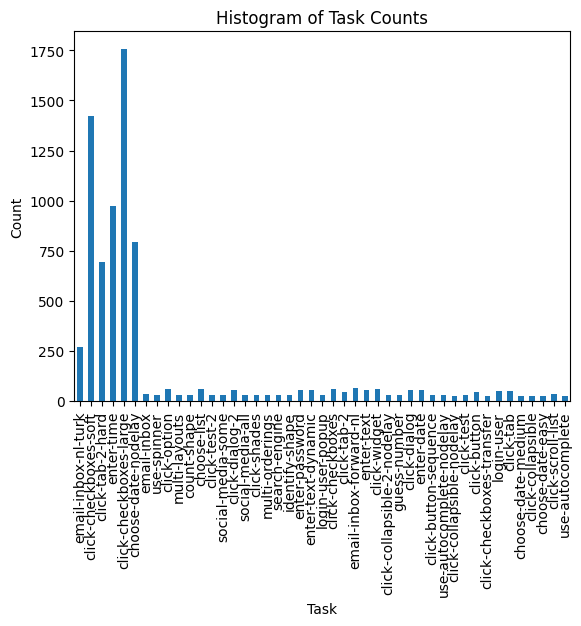

NameError: ignored

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_task_counts(df):
  # Assuming 'df' is your DataFrame with one row and task names as columns

  # Transpose the DataFrame to convert columns to rows
  df_transposed = df.T

  # Plot the histogram
  df_transposed.plot(kind='bar', legend=False)
  plt.xlabel('Task')
  plt.ylabel('Count')
  plt.title('Histogram of Task Counts')

  # Show the plot
  plt.show()

plot_task_counts(tasks)
plot_task_counts(tasks_full)

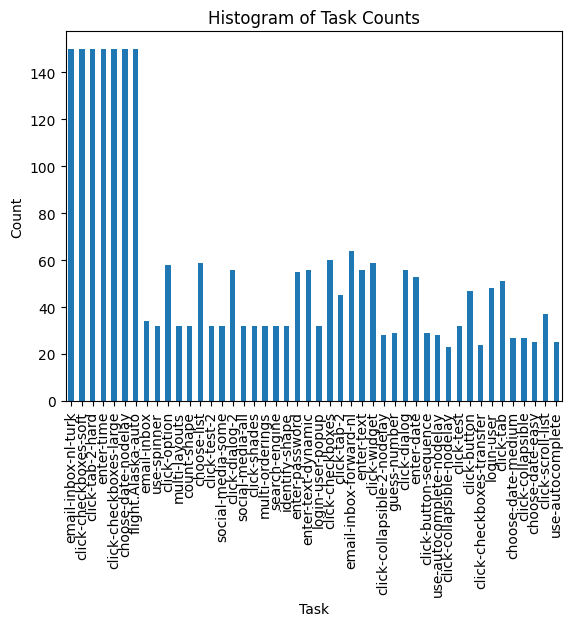

Got total 2593


In [36]:
# Let's put a cap at maximum 500 for each episode to test
import random

def sample_N(x, N):
  if len(x) < N:
    return x
  return random.sample(x, N)

downsampled_tasks = {}
downsampled_tasks_counts = {}
top_threshold = 150
total_counts = 0
for key, value in dict_tasks.items():
  samples = sample_N(value, top_threshold)
  total_counts += len(samples)
  downsampled_tasks[key] = samples
  downsampled_tasks_counts[key] = len(samples)

downsampled_tasks_counts = pd.DataFrame([downsampled_tasks_counts], columns=dict_tasks.keys())
plot_task_counts(downsampled_tasks_counts)
print(f'Got total {total_counts}')

In [37]:
import json

def save_dictionary_to_file(dictionary, file_path):
    with open(file_path, 'w') as file:
        json.dump(dictionary, file)

def load_dictionary_from_file(file_path):
    with open(file_path, 'r') as file:
        dictionary = json.load(file)
        return dictionary


In [44]:

# Save the dictionary to a file
save_dictionary_to_file(dict_tasks, '/content/drive/MyDrive/WebAI/Configs/indices_dictionary2.json')

# Load the dictionary from the file
loaded_dictionary = load_dictionary_from_file('/content/drive/MyDrive/WebAI/Configs/indices_dictionary2.json')

print(loaded_dictionary)


{'email-inbox-nl-turk': [0, 4, 6, 7, 10, 11, 16, 22, 23, 24, 26, 27, 29, 31, 34, 39, 42, 44, 45, 47, 48, 49, 52, 53, 59, 65, 67, 70, 71, 73, 78, 85, 92, 94, 96, 97, 104, 105, 108, 109, 110, 111, 112, 114, 124, 127, 131, 132, 133, 136, 137, 138, 139, 141, 144, 145, 156, 162, 163, 164, 167, 171, 172, 173, 174, 179, 181, 187, 190, 191, 194, 195, 200, 206, 207, 209, 210, 214, 215, 216, 217, 220, 221, 222, 224, 225, 228, 229, 234, 239, 243, 244, 245, 249, 254, 256, 258, 259, 260, 261, 263, 266, 269, 270, 271, 276, 277, 282, 284, 285, 286, 288, 289, 292, 293, 294, 298, 302, 303, 308, 312, 314, 321, 323, 327, 336, 342, 346, 347, 350, 351, 356, 362, 365, 374, 375, 376, 377, 378, 379, 380, 381, 385, 387, 390, 391, 392, 396, 397, 398, 402, 403, 408, 411, 412, 413, 414, 415, 418, 420, 425, 426, 432, 433, 440, 441, 445, 450, 451, 452, 453, 459, 465, 466, 468, 470, 472, 473, 475, 478, 479, 483, 487, 488, 489, 490, 491, 497, 500, 501, 506, 507, 512, 517, 519, 522, 523, 524, 525, 526, 530, 539, 544, 

In [47]:
for key, value in loaded_dictionary.items():
  for index in value:
    if index == 68:
      print('fuck')
    if index in forbidden_indexes:
      print(index)

In [26]:
for v in forbidden_indexes:
  if v == 63:
    print('f')

In [46]:
sorted(forbidden_indexes)

[2,
 8,
 12,
 13,
 19,
 20,
 21,
 37,
 63,
 64,
 68,
 74,
 81,
 86,
 87,
 90,
 101,
 117,
 129,
 134,
 135,
 142,
 143,
 149,
 152,
 154,
 155,
 158,
 159,
 160,
 161,
 166,
 177,
 185,
 193,
 199,
 204,
 212,
 213,
 219,
 227,
 230,
 231,
 240,
 241,
 247,
 250,
 264,
 272,
 274,
 279,
 290,
 307,
 333,
 334,
 339,
 345,
 353,
 358,
 359,
 367,
 370,
 383,
 393,
 394,
 395,
 406,
 407,
 416,
 417,
 422,
 423,
 429,
 434,
 438,
 439,
 460,
 461,
 471,
 476,
 477,
 484,
 492,
 494,
 495,
 502,
 503,
 504,
 505,
 509,
 515,
 521,
 546,
 556,
 572,
 574,
 586,
 587,
 591,
 596,
 597,
 607,
 610,
 611,
 624,
 625,
 638,
 639,
 644,
 645,
 652,
 653,
 658,
 666,
 667,
 670,
 671,
 683,
 688,
 694,
 695,
 712,
 713,
 714,
 718,
 719,
 720,
 721,
 726,
 727,
 731,
 746,
 747,
 750,
 764,
 765,
 772,
 773,
 778,
 779,
 780,
 781,
 796,
 797,
 802,
 803,
 804,
 808,
 809,
 814,
 815,
 820,
 821,
 836,
 837,
 840,
 841,
 856,
 857,
 862,
 863,
 868,
 869,
 874,
 879,
 886,
 887,
 890,
 891,
 897